<h4 style="color: red"> Bar Graph: </h4>
Comparision between categorical data

<h4 style="color: red"> Line Graph: </h4>
Show the trend in data over a period

<h4 style="color: red"> Pie Chart: </h4>
Visualise the proportionality of different categorical data

<h4 style="color: red"> histogram: </h4>
Plot frequency distribution of the data

<h4 style="color: red"> Bubble Plot: </h4>
Represents three attributes: by x, y, and size of the bubbles

<h4 style="color: red"> Box Plot: </h4>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leetcode-databinge/leetcode.xlsx


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_excel("/kaggle/input/leetcode-databinge/leetcode.xlsx", index_col="id")

In [4]:
df.head()

,page_number,is_premium,title,problem_description,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,submission,solution,discussion_count,likes,dislikes,problem_URL,solution_URL
id,,,,,,,,,,,,,,,,,
1.0,1.0,0.0,1. Two Sum,Given an array of integers numsÂ and an intege...,"'Array', 'Hash Table'",Easy,"[""'3Sum'"", ""'4Sum'"", ""'Two Sum II - Input Arra...",21,51.13,11300000.0,22100000.0,26800.0,638.0,52700.0,1700.0,https://leetcode.com/problems/two-sum,https://leetcode.com/problems/two-sum/solution
2.0,1.0,0.0,2. Add Two Numbers,You are given two non-empty linked lists repre...,"'Linked List', 'Math', 'Recursion'",Medium,"[""'Multiply Strings'"", ""'Add Binary'"", ""'Sum o...",8,41.50,4000000.0,9700000.0,15700.0,428.0,28900.0,5600.0,https://leetcode.com/problems/add-two-numbers,https://leetcode.com/problems/add-two-numbers/...
3.0,1.0,0.0,3. Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe...","'Hash Table', 'String', 'Sliding Window'",Medium,"[""'Longest Substring with At Most Two Distinct...",9,34.10,5100000.0,14900000.0,18100.0,237.0,37700.0,1700.0,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...
4.0,1.0,0.0,4. Median of Two Sorted Arrays,Given two sorted arrays nums1 and nums2 of siz...,"'Array', 'Binary Search', 'Divide and Conquer'",Hard,"[""'Median of a Row Wise Sorted Matrix'""]",1,38.30,2200000.0,5800000.0,14100.0,304.0,26600.0,2900.0,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...
5.0,1.0,0.0,5. Longest Palindromic Substring,"Given a string s, return the longest palindrom...","'String', 'Dynamic Programming'",Medium,"[""'Shortest Palindrome'"", ""'Palindrome Permuta...",6,33.20,2700000.0,8200000.0,9600.0,225.0,27900.0,1600.0,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...


In [5]:
#sns.barplot(x="difficulty",y="no_similar_questions",data=leetcode)

In [6]:
df.describe()

,page_number,is_premium,acceptance,accepted,submission,solution,discussion_count,likes,dislikes
count,3000.000000,3000.000000,3000.000000,2.160000e+03,2.160000e+03,2160.000000,2160.000000,2160.000000,2160.000000
mean,30.500000,0.280000,55.610410,2.478878e+05,4.752565e+05,1653.675926,27.246296,2774.904630,403.934259
std,17.320989,0.449074,15.702655,5.373006e+05,1.118383e+06,2515.823036,40.675622,4186.567949,986.693398
min,1.000000,0.000000,11.300000,1.200000e+03,2.400000e+03,24.000000,0.000000,15.000000,1.000000
25%,15.750000,0.000000,44.000000,2.350000e+04,4.897500e+04,286.000000,6.000000,456.000000,44.000000
50%,30.500000,0.000000,55.000000,6.630000e+04,1.169000e+05,706.000000,12.000000,1100.000000,132.000000
75%,45.250000,1.000000,66.700000,2.151500e+05,3.850750e+05,1900.000000,33.000000,3200.000000,354.250000
max,60.000000,1.000000,94.200000,1.130000e+07,2.210000e+07,26800.000000,638.000000,52700.000000,17200.000000


## Question 1

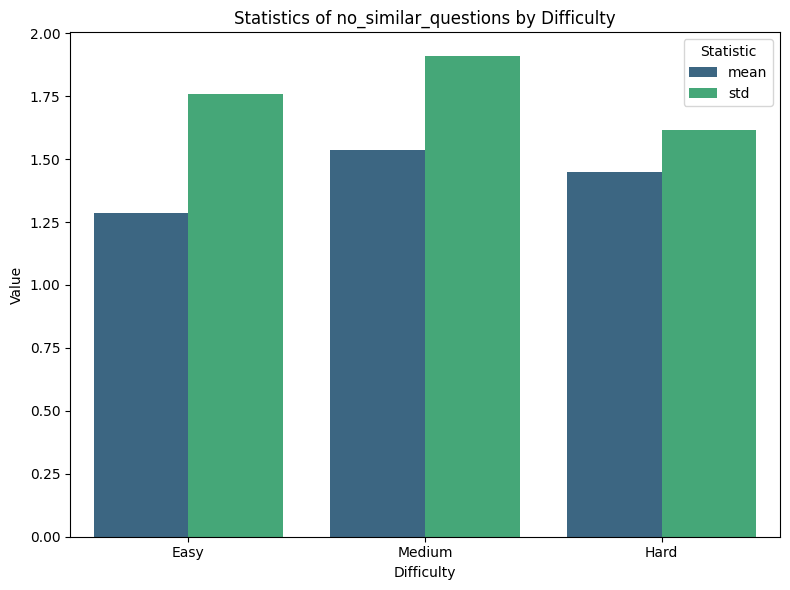

In [7]:
# Cleaning null data
df = df.dropna(subset=["difficulty","no_similar_questions"])

# Calculate statistics
stats = df.groupby('difficulty')['no_similar_questions'].agg(['mean', 'std']).reset_index()

# Melt the dataframe for seaborn compatibility
stats_melted = stats.melt(id_vars='difficulty', var_name='Statistic', value_name='Value')

# Set the desired order for difficulty levels
difficulty_order = ['Easy', 'Medium', 'Hard']

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    data=stats_melted,
    x='difficulty',
    y='Value',
    hue='Statistic',
    palette='viridis',
    order=difficulty_order  # Set the desired order
)

# Customize the plot
plt.title('Statistics of no_similar_questions by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Value')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

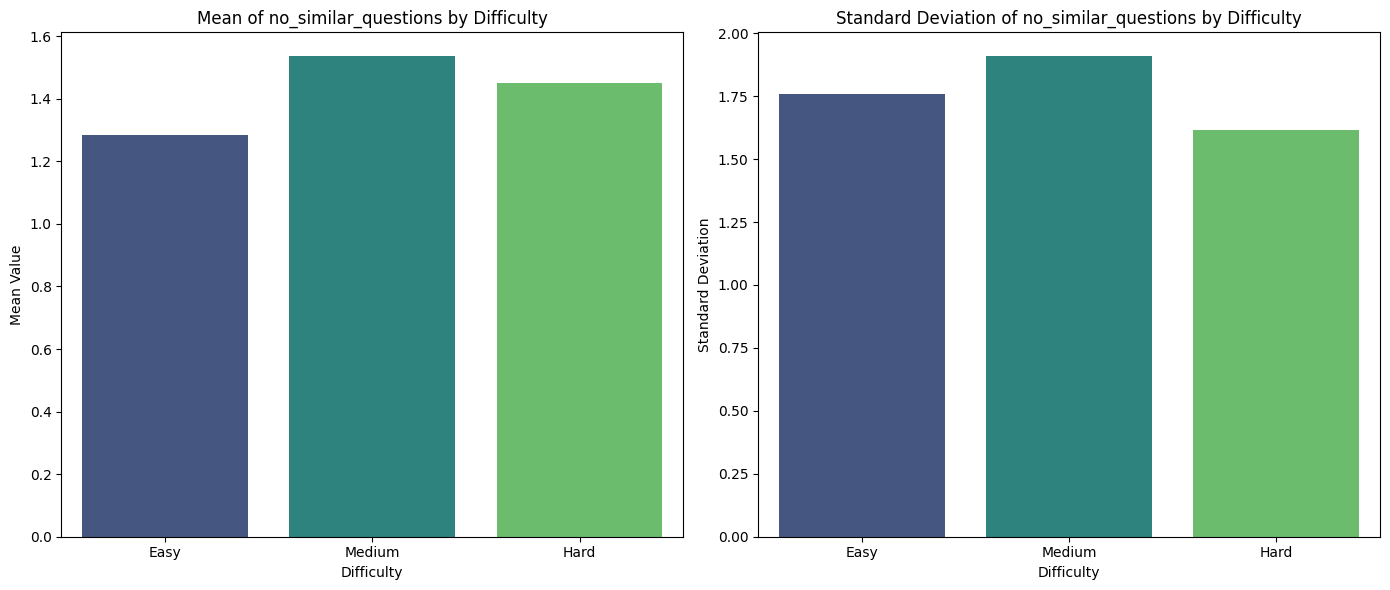

In [8]:
# Calculate statistics (mean and std)
stats = df.groupby('difficulty')['no_similar_questions'].agg(['mean', 'std']).reset_index()

# Separate mean and std for separate plots
mean_data = stats[['difficulty', 'mean']]
std_data = stats[['difficulty', 'std']]

# Set the desired order for difficulty levels
difficulty_order = ['Easy', 'Medium', 'Hard']

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Mean
sns.barplot(data=mean_data, x='difficulty', y='mean', order=difficulty_order, ax=axes[0], palette='viridis')
axes[0].set_title('Mean of no_similar_questions by Difficulty')
axes[0].set_xlabel('Difficulty')
axes[0].set_ylabel('Mean Value')

# Plot Standard Deviation
sns.barplot(data=std_data, x='difficulty', y='std', order=difficulty_order, ax=axes[1], palette='viridis')
axes[1].set_title('Standard Deviation of no_similar_questions by Difficulty')
axes[1].set_xlabel('Difficulty')
axes[1].set_ylabel('Standard Deviation')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['page_number', 'is_premium', 'title', 'problem_description',
       'topic_tags', 'difficulty', 'similar_questions', 'no_similar_questions',
       'acceptance', 'accepted', 'submission', 'solution', 'discussion_count',
       'likes', 'dislikes', 'problem_URL', 'solution_URL'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


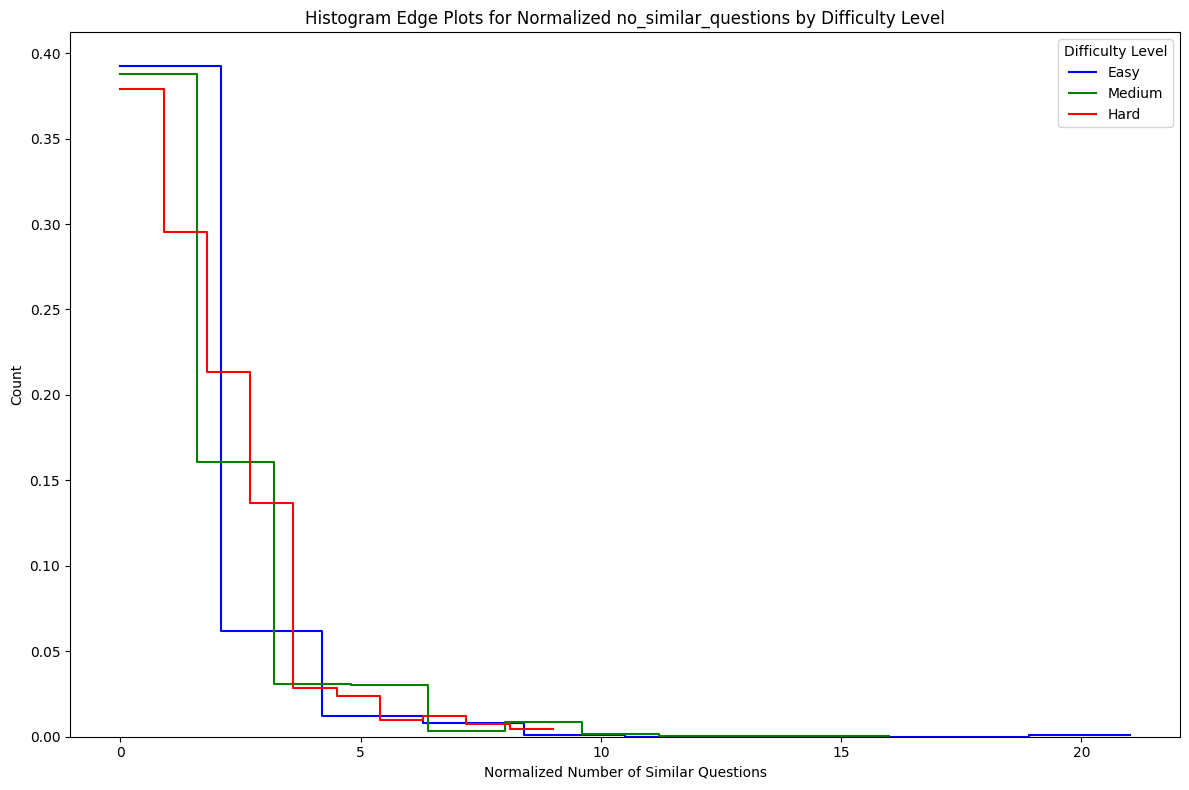

In [10]:
# Filter data for each difficulty level
easy_data = df[df['difficulty'] == 'Easy']['no_similar_questions']
medium_data = df[df['difficulty'] == 'Medium']['no_similar_questions']
hard_data = df[df['difficulty'] == 'Hard']['no_similar_questions']

# Convert the data to numeric type
easy_data = pd.to_numeric(easy_data)
medium_data = pd.to_numeric(medium_data)
hard_data = pd.to_numeric(hard_data)

# Plot histograms
plt.figure(figsize=(12, 8))

# Easy difficulty
sns.histplot(easy_data, kde=False, bins=10, color='blue', label='Easy', fill=False, element='step', stat='density')

# Medium difficulty
sns.histplot(medium_data, kde=False, bins=10, color='green', label='Medium', fill=False, element='step', stat='density')

# Hard difficulty
sns.histplot(hard_data, kde=False, bins=10, color='red', label='Hard', fill=False, element='step', stat='density')

# Customize the plot
plt.title('Histogram Edge Plots for Normalized no_similar_questions by Difficulty Level')
plt.xlabel('Normalized Number of Similar Questions')
plt.ylabel('Count')
plt.legend(title='Difficulty Level')
plt.tight_layout()
plt.show()

## Question 2

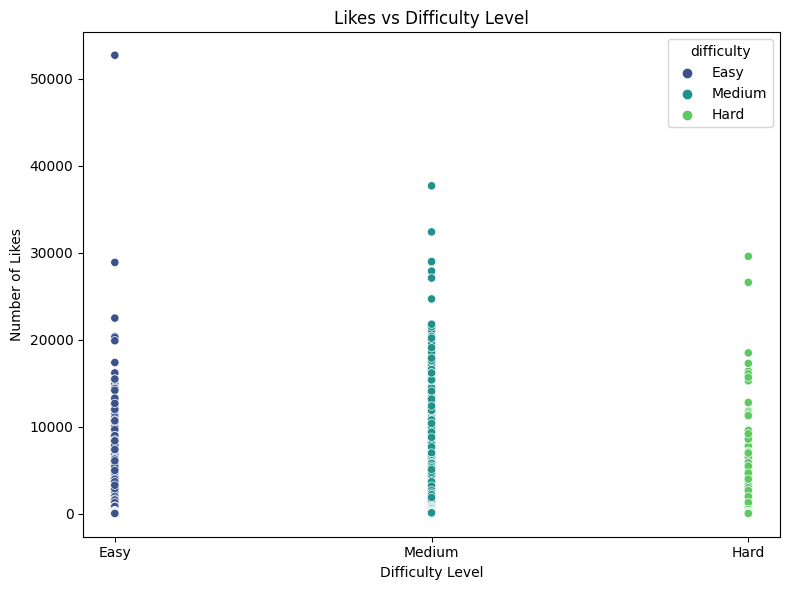

In [11]:
# Encode the difficulty levels as numeric values for plotting
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Scatter plot for Likes vs Difficulty
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='difficulty_encoded', y='likes', hue='difficulty', palette='viridis')

# Customize the plot
plt.title('Likes vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Likes')
plt.xticks([1, 2, 3], ['Easy', 'Medium', 'Hard'])  # Label the difficulty levels
plt.tight_layout()
plt.show()

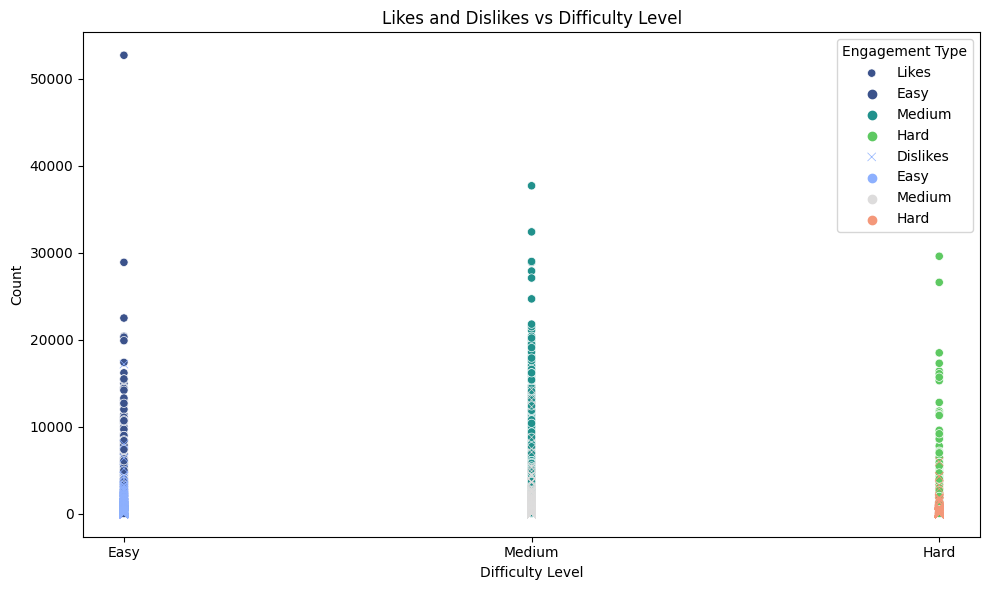

In [12]:
# Encode the difficulty levels as numeric values for plotting
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Scatter plot for Likes vs Difficulty
plt.figure(figsize=(10, 6))

# Plot likes
sns.scatterplot(data=df, x='difficulty_encoded', y='likes', hue='difficulty', palette='viridis', marker='o', label='Likes')

# Plot dislikes
sns.scatterplot(data=df, x='difficulty_encoded', y='dislikes', hue='difficulty', palette='coolwarm', marker='x', label='Dislikes')

# Customize the plot
plt.title('Likes and Dislikes vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks([1, 2, 3], ['Easy', 'Medium', 'Hard'])  # Label the difficulty levels
plt.legend(title='Engagement Type')
plt.tight_layout()
plt.show()

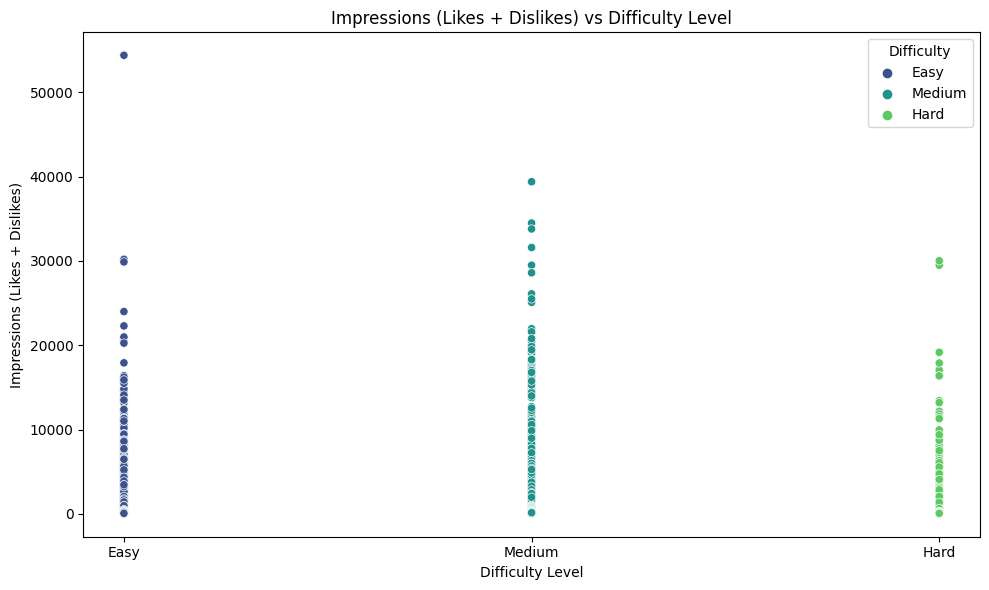

In [13]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Encode the difficulty levels as numeric values for plotting
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Scatter plot for Impressions vs Difficulty
plt.figure(figsize=(10, 6))

# Plot impressions
sns.scatterplot(data=df, x='difficulty_encoded', y='impressions', hue='difficulty', palette='viridis', marker='o')

# Customize the plot
plt.title('Impressions (Likes + Dislikes) vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Impressions (Likes + Dislikes)')
plt.xticks([1, 2, 3], ['Easy', 'Medium', 'Hard'])  # Label the difficulty levels
plt.legend(title='Difficulty')
plt.tight_layout()
plt.show()

Pearson correlation between impressions and difficulty level: -0.06


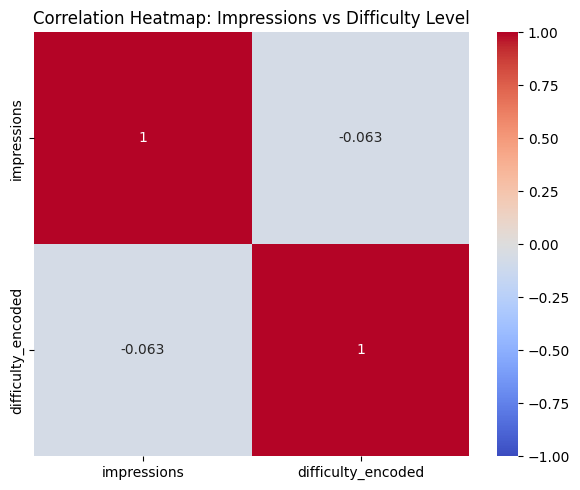

In [14]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Encode the difficulty levels as numeric values for plotting
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Calculate Pearson correlation between 'impressions' and 'difficulty_encoded'
correlation, _ = pearsonr(df['impressions'], df['difficulty_encoded'])

# Print Pearson correlation coefficient
print(f"Pearson correlation between impressions and difficulty level: {correlation:.2f}")

# Create a correlation heatmap for the features
correlation_matrix = df[['impressions', 'difficulty_encoded']].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Impressions vs Difficulty Level')
plt.tight_layout()
plt.show()

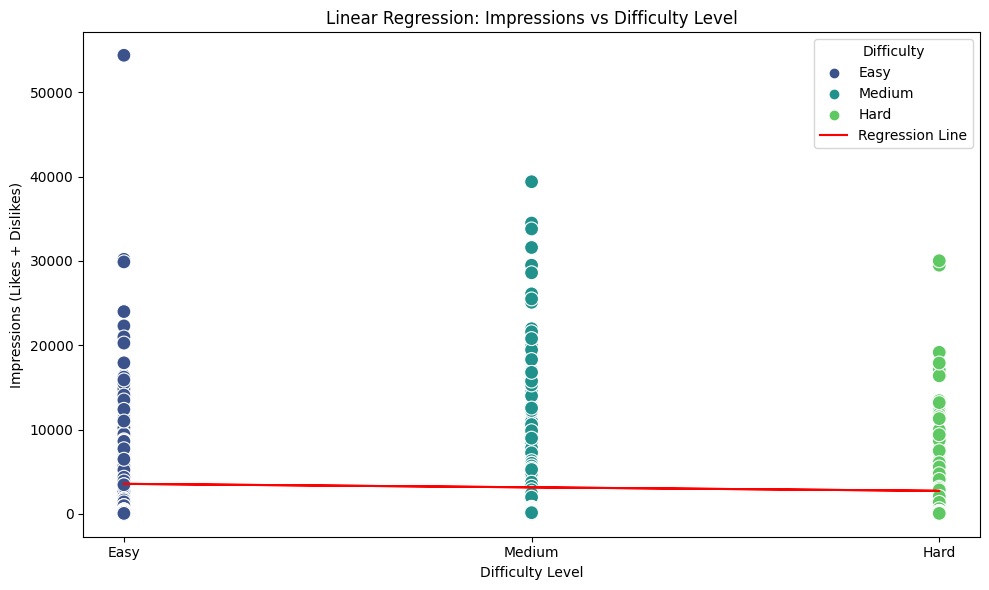

Model Coefficients: [-414.44620471]
Model Intercept: 3982.979649971551


In [15]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Encode the difficulty levels as numeric values for plotting
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Fit a linear regression model
X = df[['difficulty_encoded']]  # Features (difficulty encoded)
y = df['impressions']  # Target variable (impressions)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values using the model for the regression line
y_pred = model.predict(X)

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='difficulty_encoded', y='impressions', hue='difficulty', palette='viridis', s=100)

# Plot the regression line
plt.plot(df['difficulty_encoded'], y_pred, color='red', linestyle='-', label='Regression Line')

# Customize the plot
plt.title('Linear Regression: Impressions vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Impressions (Likes + Dislikes)')
plt.xticks([1, 2, 3], ['Easy', 'Medium', 'Hard'])  # Label the difficulty levels
plt.legend(title='Difficulty')
plt.tight_layout()
plt.show()

# Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

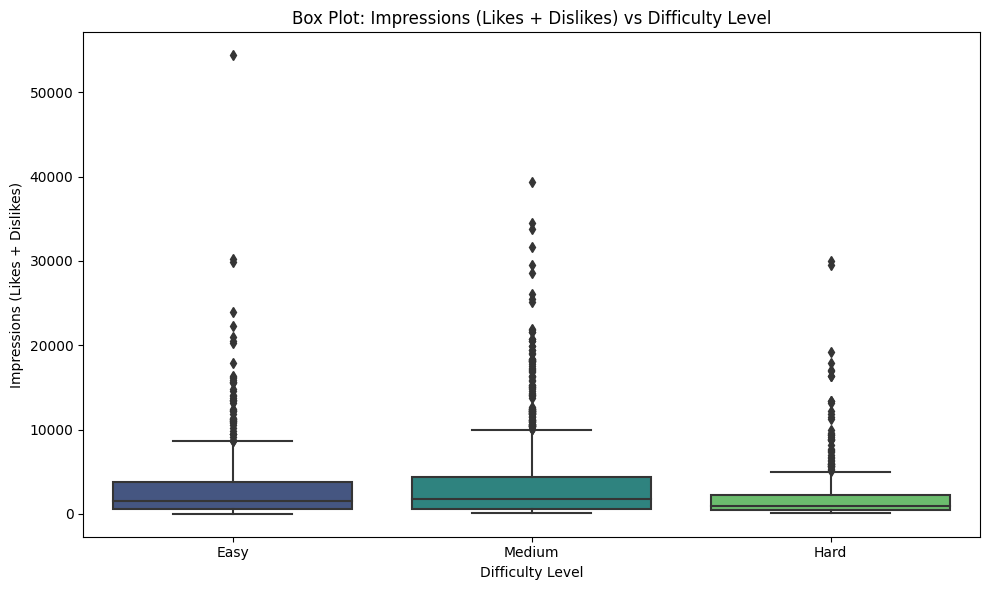

In [16]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Box plot for Impressions across Difficulty Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='difficulty', y='impressions', palette='viridis')

# Customize the plot
plt.title('Box Plot: Impressions (Likes + Dislikes) vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Impressions (Likes + Dislikes)')
plt.tight_layout()
plt.show()

Spearman's rank correlation between impressions and difficulty level: -0.07


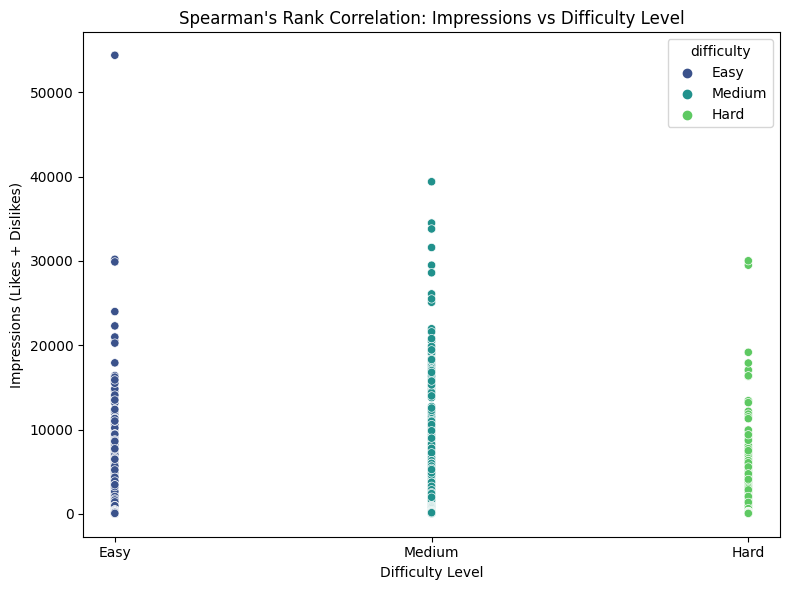

In [17]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Encode the difficulty levels as numeric values for correlation
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['difficulty_encoded'] = df['difficulty'].map(difficulty_mapping)

# Calculate Spearman's rank correlation
correlation, _ = spearmanr(df['impressions'], df['difficulty_encoded'])

# Print Spearman's correlation coefficient
print(f"Spearman's rank correlation between impressions and difficulty level: {correlation:.2f}")

# Optional: Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='difficulty_encoded', y='impressions', hue='difficulty', palette='viridis')

# Customize the plot
plt.title("Spearman's Rank Correlation: Impressions vs Difficulty Level")
plt.xlabel('Difficulty Level')
plt.ylabel('Impressions (Likes + Dislikes)')
plt.xticks([1, 2, 3], ['Easy', 'Medium', 'Hard'])  # Label the difficulty levels
plt.tight_layout()
plt.show()

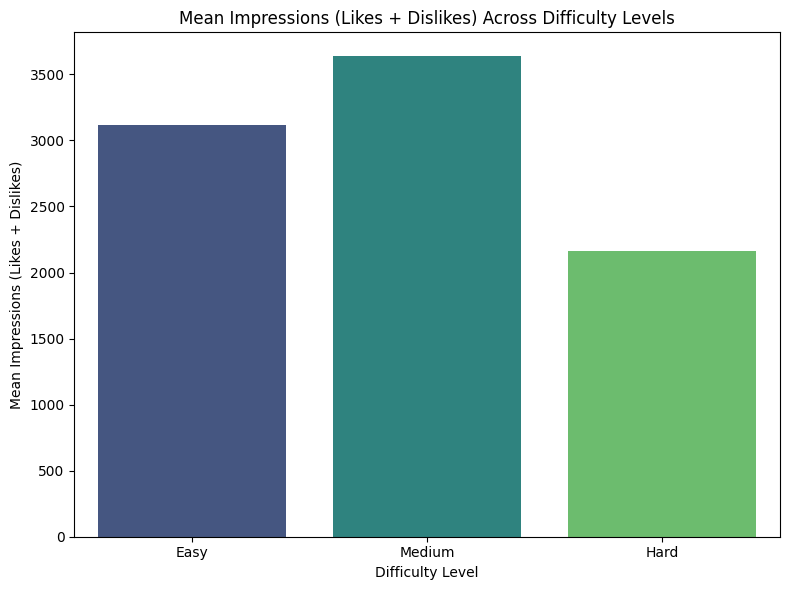

In [18]:
# Create the 'impressions' column as the sum of likes and dislikes
df['impressions'] = df['likes'] + df['dislikes']

# Group by 'difficulty' and calculate the sum of likes, dislikes, and impressions
grouped = df.groupby('difficulty').agg({'likes': 'sum', 'dislikes': 'sum', 'impressions': 'sum'})

# Calculate the mean of impressions for each difficulty level
grouped['mean_impressions'] = grouped['impressions'] / df['difficulty'].value_counts()

# Plot a bar graph for the mean impressions across difficulty levels
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y=grouped['mean_impressions'], palette='viridis', order=['Easy', 'Medium', 'Hard'])

# Customize the plot
plt.title('Mean Impressions (Likes + Dislikes) Across Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Mean Impressions (Likes + Dislikes)')
plt.tight_layout()
plt.show()

## Question 3

In [19]:
df.head()

,page_number,is_premium,title,problem_description,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,submission,solution,discussion_count,likes,dislikes,problem_URL,solution_URL,difficulty_encoded,impressions
id,,,,,,,,,,,,,,,,,,,
1.0,1.0,0.0,1. Two Sum,Given an array of integers numsÂ and an intege...,"'Array', 'Hash Table'",Easy,"[""'3Sum'"", ""'4Sum'"", ""'Two Sum II - Input Arra...",21,51.13,11300000.0,22100000.0,26800.0,638.0,52700.0,1700.0,https://leetcode.com/problems/two-sum,https://leetcode.com/problems/two-sum/solution,1,54400.0
2.0,1.0,0.0,2. Add Two Numbers,You are given two non-empty linked lists repre...,"'Linked List', 'Math', 'Recursion'",Medium,"[""'Multiply Strings'"", ""'Add Binary'"", ""'Sum o...",8,41.50,4000000.0,9700000.0,15700.0,428.0,28900.0,5600.0,https://leetcode.com/problems/add-two-numbers,https://leetcode.com/problems/add-two-numbers/...,2,34500.0
3.0,1.0,0.0,3. Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe...","'Hash Table', 'String', 'Sliding Window'",Medium,"[""'Longest Substring with At Most Two Distinct...",9,34.10,5100000.0,14900000.0,18100.0,237.0,37700.0,1700.0,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...,2,39400.0
4.0,1.0,0.0,4. Median of Two Sorted Arrays,Given two sorted arrays nums1 and nums2 of siz...,"'Array', 'Binary Search', 'Divide and Conquer'",Hard,"[""'Median of a Row Wise Sorted Matrix'""]",1,38.30,2200000.0,5800000.0,14100.0,304.0,26600.0,2900.0,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...,3,29500.0
5.0,1.0,0.0,5. Longest Palindromic Substring,"Given a string s, return the longest palindrom...","'String', 'Dynamic Programming'",Medium,"[""'Shortest Palindrome'"", ""'Palindrome Permuta...",6,33.20,2700000.0,8200000.0,9600.0,225.0,27900.0,1600.0,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...,2,29500.0


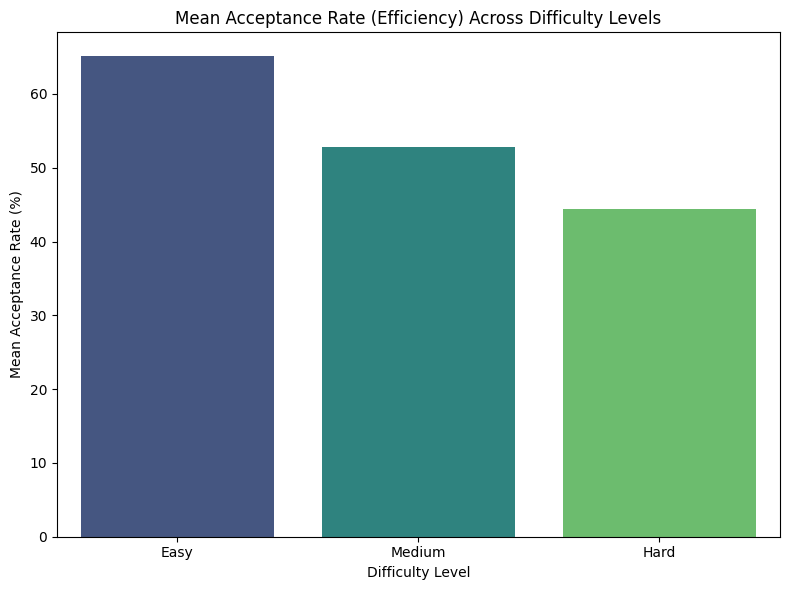

In [20]:
# Group by 'difficulty' and calculate the mean acceptance for each difficulty level
acceptance_grouped = df.groupby('difficulty')['acceptance'].mean()

# Plot a bar graph for the mean acceptance (efficiency) across difficulty levels
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_grouped.index, y=acceptance_grouped, palette='viridis', order=['Easy', 'Medium', 'Hard'])

# Customize the plot
plt.title('Mean Acceptance Rate (Efficiency) Across Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Mean Acceptance Rate (%)')
plt.tight_layout()
plt.show()

Outlier Summary for Each Difficulty Level:
            Outlier Count  Outlier Percentage
difficulty                                   
Easy                   18            3.040541
Hard                   21            4.535637
Medium                 52            4.705882


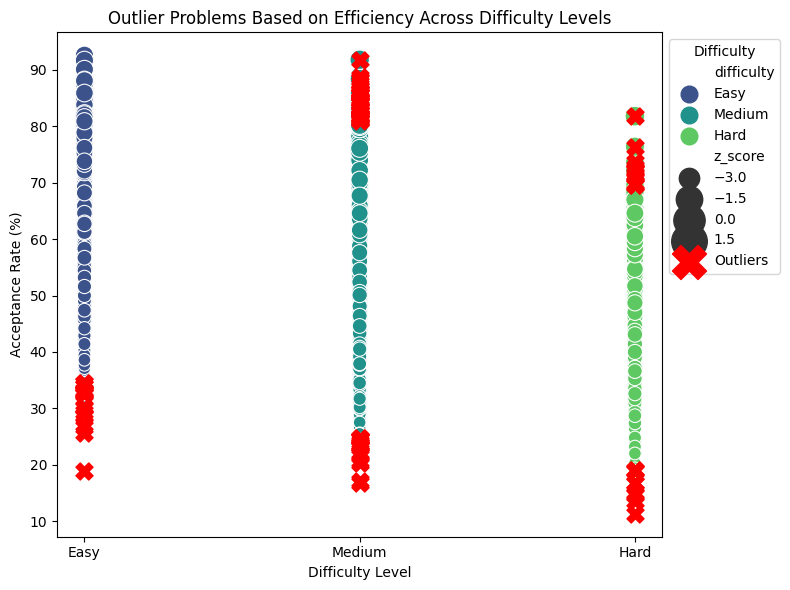

In [21]:
# Calculate the mean and standard deviation of acceptance for each difficulty
difficulty_stats = df.groupby('difficulty')['acceptance'].agg(['mean', 'std'])

# Merge the stats back into the original dataframe
df = df.merge(difficulty_stats, on='difficulty', how='left', suffixes=('', '_difficulty'))

# Calculate the z-score for each problem
df['z_score'] = (df['acceptance'] - df['mean']) / df['std']

# Identify outliers (z-score > 2 or z-score < -2)
outliers = df[(df['z_score'] > 2) | (df['z_score'] < -2)]

# Count the total number of problems and outliers per difficulty level
outliers_count = outliers.groupby('difficulty').size()
total_count = df.groupby('difficulty').size()

# Calculate the percentage of outliers for each difficulty
outliers_percentage = (outliers_count / total_count) * 100

# Combine the count and percentage into a DataFrame
outlier_summary = pd.DataFrame({
    'Outlier Count': outliers_count,
    'Outlier Percentage': outliers_percentage
})

# Print the summary of outliers
print("Outlier Summary for Each Difficulty Level:")
print(outlier_summary)

# Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='difficulty', y='acceptance', hue='difficulty', palette='viridis', size='z_score', sizes=(50, 200))

# Highlight outliers
plt.scatter(outliers['difficulty'], outliers['acceptance'], color='red', label='Outliers', s=150, marker='X')

# Customize the plot
plt.title('Outlier Problems Based on Efficiency Across Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Acceptance Rate (%)')

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Difficulty", markerscale=2)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

## Question 4

Pearson's Correlation Coefficient: 0.022
Pearson's p-value: 0.296
Spearman's Rank Correlation Coefficient: 0.146
Spearman's p-value: 0.000
Pearson's correlation is not significant (fail to reject H0). There is no significant relationship between acceptance rate and likes.
Spearman's rank correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.


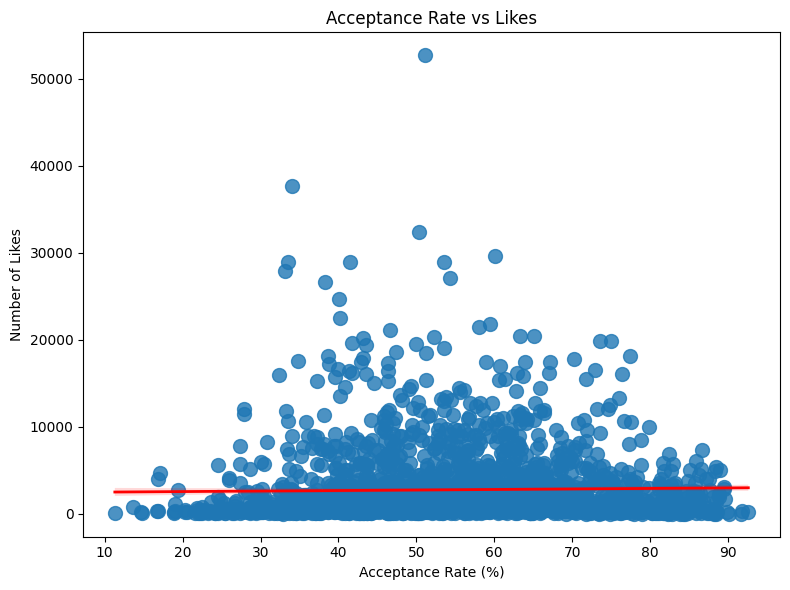

In [22]:
# Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(df['acceptance'], df['likes'])

# Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(df['acceptance'], df['likes'])

# Print the results of both tests
print(f"Pearson's Correlation Coefficient: {pearson_corr:.3f}")
print(f"Pearson's p-value: {pearson_p_value:.3f}")
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.3f}")
print(f"Spearman's p-value: {spearman_p_value:.3f}")

# Interpretation based on p-value
if pearson_p_value < 0.05:
    print("Pearson's correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.")
else:
    print("Pearson's correlation is not significant (fail to reject H0). There is no significant relationship between acceptance rate and likes.")

if spearman_p_value < 0.05:
    print("Spearman's rank correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.")
else:
    print("Spearman's rank correlation is not significant (fail to reject H0). There is no significant relationship between acceptance rate and likes.")

# Plotting for visualization
plt.figure(figsize=(8, 6))

# Scatter plot with regression line
sns.regplot(x='acceptance', y='likes', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.title('Acceptance Rate vs Likes')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Number of Likes')
plt.tight_layout()
plt.show()

Pearson's Correlation Coefficient: 0.263
Pearson's p-value: 0.000
Spearman's Rank Correlation Coefficient: 0.571
Spearman's p-value: 0.000
Pearson's correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.
Spearman's rank correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.


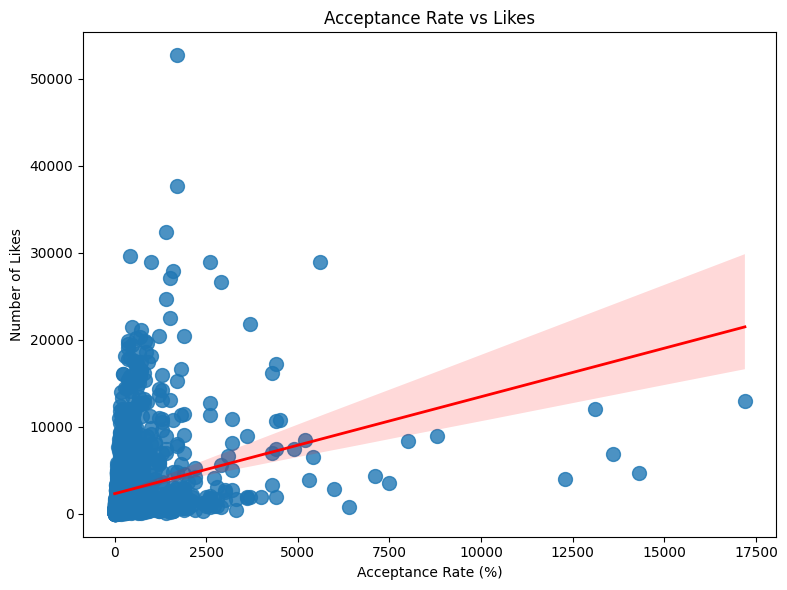

In [23]:
# Pearson's correlation test
pearson_corr, pearson_p_value = pearsonr(df['dislikes'], df['likes'])

# Spearman's rank correlation test
spearman_corr, spearman_p_value = spearmanr(df['dislikes'], df['likes'])

# Print the results of both tests
print(f"Pearson's Correlation Coefficient: {pearson_corr:.3f}")
print(f"Pearson's p-value: {pearson_p_value:.3f}")
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.3f}")
print(f"Spearman's p-value: {spearman_p_value:.3f}")

# Interpretation based on p-value
if pearson_p_value < 0.05:
    print("Pearson's correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.")
else:
    print("Pearson's correlation is not significant (fail to reject H0). There is no significant relationship between acceptance rate and likes.")

if spearman_p_value < 0.05:
    print("Spearman's rank correlation is significant (reject H0). There is a significant relationship between acceptance rate and likes.")
else:
    print("Spearman's rank correlation is not significant (fail to reject H0). There is no significant relationship between acceptance rate and likes.")

# Plotting for visualization
plt.figure(figsize=(8, 6))

# Scatter plot with regression line
sns.regplot(x='dislikes', y='likes', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.title('Acceptance Rate vs Likes')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Number of Likes')
plt.tight_layout()
plt.show()

## Question 5

In [24]:
# Create a contingency table of difficulty vs is_premium
contingency_table = pd.crosstab(df['difficulty'], df['is_premium'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between difficulty level and whether the problem is premium.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between difficulty level and whether the problem is premium.")

Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[ 592.]
 [ 463.]
 [1105.]]
Fail to reject the null hypothesis: There is no significant relationship between difficulty level and whether the problem is premium.


## Brownie Question

In [25]:
topics = []
for data in df.itertuples():
    topics.extend((data.topic_tags.replace('\'','')).split(', '))

topics = list(set(topics))
print(topics)

['Merge Sort', 'Strongly Connected Component', 'Prefix Sum', 'Backtracking', 'Topological Sort', 'JavaScript', 'Enumeration', 'Line Sweep', 'Biconnected Component', 'Design', 'Monotonic Queue', 'Tree', 'String', 'Suffix Array', 'Breadth-First Search', 'Interactive', 'Iterator', 'Reservoir Sampling', 'Combinatorics', 'Rolling Hash', 'Ordered Set', 'Divide and Conquer', 'Randomized', 'Math', 'Two Pointers', 'Linked List', 'Greedy', 'Pandas', 'Bitmask', 'Doubly-Linked List', 'Geometry', 'Sort', 'Sliding Window', 'Simulation', 'Counting', 'Radix Sort', 'Number Theory', 'Data Stream', 'Stack', 'Memoization', 'Shell', 'Probability and Statistics', 'String Matching', 'Binary Search Tree', 'Heap (Priority Queue)', 'Binary Tree', 'Segment Tree', 'Queue', 'Rejection Sampling', 'Trie', 'Shortest Path', 'Recursion', 'Hash Function', 'Graph', 'Counting Sort', 'Sorting', 'Bit Manipulation', 'Hash Table', 'Quickselect', 'Depth-First Search', 'Monotonic Stack', 'Bucket Sort', 'Brainteaser', 'Eulerian 

In [26]:
# Add a new column 'num_topic_tags' that stores the count of topic tags as a comma-separated string
df['num_topic_tags'] = df['topic_tags'].apply(lambda x: int(len(x.split(', '))))

# Display the DataFrame
df.head()

,page_number,is_premium,title,problem_description,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,...,likes,dislikes,problem_URL,solution_URL,difficulty_encoded,impressions,mean,std,z_score,num_topic_tags
0,1.0,0.0,1. Two Sum,Given an array of integers numsÂ and an intege...,"'Array', 'Hash Table'",Easy,"[""'3Sum'"", ""'4Sum'"", ""'Two Sum II - Input Arra...",21,51.13,11300000.0,...,52700.0,1700.0,https://leetcode.com/problems/two-sum,https://leetcode.com/problems/two-sum/solution,1,54400.0,65.097517,14.643935,-0.953809,2
1,1.0,0.0,2. Add Two Numbers,You are given two non-empty linked lists repre...,"'Linked List', 'Math', 'Recursion'",Medium,"[""'Multiply Strings'"", ""'Add Binary'"", ""'Sum o...",8,41.50,4000000.0,...,28900.0,5600.0,https://leetcode.com/problems/add-two-numbers,https://leetcode.com/problems/add-two-numbers/...,2,34500.0,52.844706,13.957589,-0.812798,3
2,1.0,0.0,3. Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe...","'Hash Table', 'String', 'Sliding Window'",Medium,"[""'Longest Substring with At Most Two Distinct...",9,34.10,5100000.0,...,37700.0,1700.0,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...,2,39400.0,52.844706,13.957589,-1.342976,3
3,1.0,0.0,4. Median of Two Sorted Arrays,Given two sorted arrays nums1 and nums2 of siz...,"'Array', 'Binary Search', 'Divide and Conquer'",Hard,"[""'Median of a Row Wise Sorted Matrix'""]",1,38.30,2200000.0,...,26600.0,2900.0,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...,3,29500.0,44.413607,12.576081,-0.486130,3
4,1.0,0.0,5. Longest Palindromic Substring,"Given a string s, return the longest palindrom...","'String', 'Dynamic Programming'",Medium,"[""'Shortest Palindrome'"", ""'Palindrome Permuta...",6,33.20,2700000.0,...,27900.0,1600.0,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...,2,29500.0,52.844706,13.957589,-1.407457,2
